In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline

In [105]:
# Read raw data

df = pd.read_csv('./dataset/stackoverflow_data/survey_results_public.csv')
df['MajorUndergrad'].value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

In [109]:
def missingValue(col_names, df):
    df = df.dropna(subset = [col_names])
    value_perc = df[col_names].value_counts() / df.shape[0]
    return value_perc
    

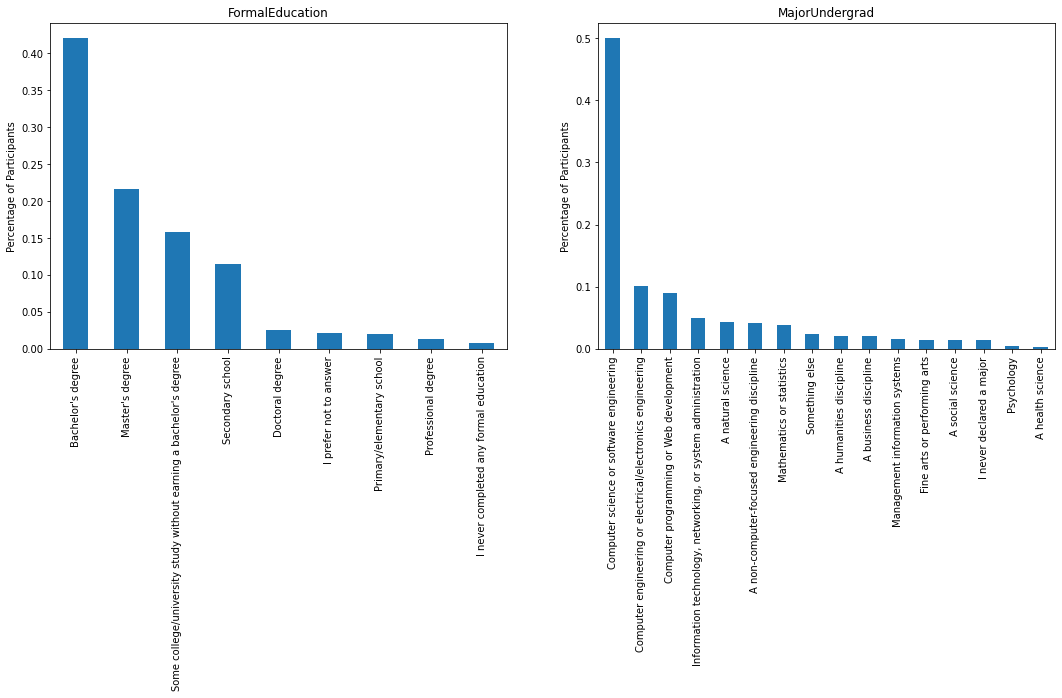

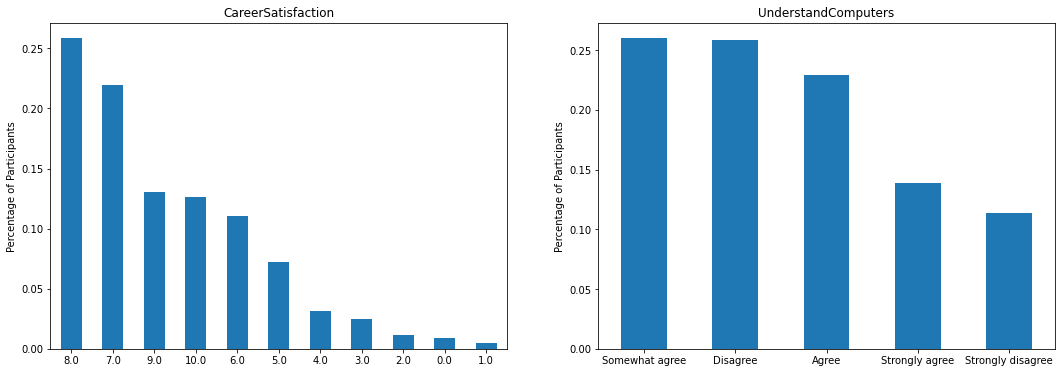

In [122]:
# The columns to be used
working_df = df[['FormalEducation', 'MajorUndergrad', 'CareerSatisfaction', 'UnderstandComputers']]
col_names = working_df.columns
fig1, axs1 = plt.subplots(1, 2, figsize = (18, 6))
fig2, axs2 = plt.subplots(1, 2, figsize = (18, 6))

for names, ax in zip(col_names[0:2], axs1.ravel()):
    value_perc = missingValue(names, working_df)
    value_perc.plot.bar(x = 'index', rot = 90, ax = ax)

    # chart formatting
    ax.set_title(names)
    ax.set_ylabel("Percentage of Participants")

for names, ax in zip(col_names[2:4], axs2.ravel()):
    value_perc = missingValue(names, working_df)
    value_perc.plot.bar(x = 'index', rot = 0, ax = ax)

    # chart formatting
    ax.set_title(names)
    ax.set_ylabel("Percentage of Participants")
    


In [87]:
## Processing missing values and categorical values

perc = 50.0
drop_sal_df = working_df.dropna(subset=['ExpectedSalary'], axis = 0) 
min_nonNaN_count = int((100-perc)/100 * drop_sal_df.shape[0] + 1)
drop_sal_df = drop_sal_df.dropna(axis = 1, thresh = min_nonNaN_count)
drop_sal_df.isnull().sum() / drop_sal_df.shape[0]
counts = drop_sal_df['MajorUndergrad'].value_counts()
counts / drop_sal_df.shape[0]

Computer science or software engineering                        0.282541
Computer programming or Web development                         0.067030
Computer engineering or electrical/electronics engineering      0.047545
Information technology, networking, or system administration    0.035074
A natural science                                               0.017147
A non-computer-focused engineering discipline                   0.015978
Something else                                                  0.015588
A business discipline                                           0.013640
Mathematics or statistics                                       0.012471
A humanities discipline                                         0.008963
I never declared a major                                        0.005846
Fine arts or performing arts                                    0.005456
A social science                                                0.005456
Management information systems                     